In [3]:
from lmfit import Parameters, models
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.signal import wiener, filtfilt, butter, gaussian, freqz
from scipy.ndimage import filters
from core.util.units import compute_dft

In [40]:
def voigt_testing():

    x_axis = np.linspace(800, 1000, 301)

    mod, params = fitlogic.make_lorentzian_model()
    
    p = Parameters()
    p.add('amplitude',value=30.)
    p.add('center',value=920.)
    p.add('sigma',value=10)
    p.add('offset',value=10.)

    data_noisy = (mod.eval(x=x_axis, params=p) + 10 * np.random.normal(size=x_axis.shape))

    voigt_mod = models.VoigtModel()

    error, par = fitlogic.estimate_lorentzian_peak(
        x_axis,
        data_noisy,
        params)
    print(par)
    
    params = mod.make_params()
    print(params)

    # auxiliary variables
    stepsize = x_axis[1] - x_axis[0]
    n_steps = len(x_axis)

    if x_axis[1] - x_axis[0] > 0:

        params['amplitude'].set(
            value=par['amplitude'].value,
            vary=True,
            min=2e-12,
            max=np.inf)
        params['sigma'].set(
            value=par['sigma'].value,
            vary=True,
            min=(x_axis[1] - x_axis[0])/2,
            max=(x_axis[-1] - x_axis[0])*10)
        params['center'].set(
            value=par['center'].value,
            vary=True,
            min=(x_axis[0]) - n_steps * stepsize,
            max=(x_axis[-1]) + n_steps * stepsize)
        params['offset'].set(
            value=par['offset'].value,
            vary=True,
            min=-1000,
            max=1000)
        
    if x_axis[0] - x_axis[1] > 0:

        params['amplitude'].set(
            value=par['amplitude'].value,
            vary=True,
            min=2e-12,
            max=np.inf)
        params['sigma'].set(
            value=par['sigma'].value,
            vary=True,
            min=(x_axis[0] - x_axis[1])/2,
            max=(x_axis[0]-x_axis[1])*10)
        params['center'].set(
            value=par['center'].value,
            vary=True,
            min=x_axis[-1],
            max=x_axis[0])
        params['offset'].set(
            value=par['offset'].value,
            vary=True,
            min=-1000,
            max=1000)

    result = mod.fit(data_noisy, x=x_axis, params=params)

    plt.figure()
    plt.plot(x_axis, data_noisy, label='measured data')
    plt.plot(x_axis, mod.eval(x=x_axis, params=p), label='original function')
    plt.plot(x_axis, result.best_fit, 'r', label='fit')
    plt.xlabel('Time micro-s')
    plt.ylabel('signal')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    plt.show()

Parameters([('amplitude', <Parameter 'amplitude', 34.740780237092395, bounds=[-1e-12:inf]>), ('center', <Parameter 'center', 918.66666666666663, bounds=[599.33333333334474:1200.6666666666551]>), ('sigma', <Parameter 'sigma', 9.3482112730948721, bounds=[0.33333333333331439:2000.0]>), ('offset', <Parameter 'offset', 9.4110742195971433, bounds=[-inf:inf]>), ('fwhm', <Parameter 'fwhm', 18.696422546189744, bounds=[-inf:inf], expr='2*sigma'>), ('contrast', <Parameter 'contrast', 369.14787224555045, bounds=[-inf:inf], expr='(amplitude/offset)*100'>)])
Parameters([('amplitude', <Parameter 'amplitude', -inf, bounds=[-inf:inf]>), ('center', <Parameter 'center', -inf, bounds=[-inf:inf]>), ('sigma', <Parameter 'sigma', -inf, bounds=[-inf:inf]>), ('offset', <Parameter 'offset', -inf, bounds=[-inf:inf]>), ('fwhm', <Parameter 'fwhm', -inf, bounds=[-inf:inf], expr='2*sigma'>), ('contrast', <Parameter 'contrast', nan, bounds=[-inf:inf], expr='(amplitude/offset)*100'>)])


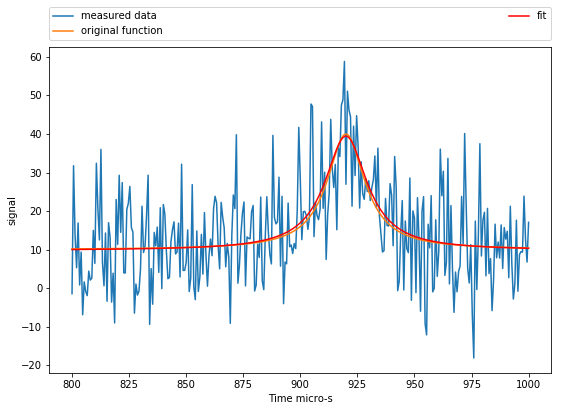

In [41]:
voigt_testing()